In [ ]:
from fastai.basics import *
from fastai.vision.all import *
from sklearn import metrics

/home/tiago/anaconda3/envs/fastai/lib/python3.9/site-packages/torch/cuda/__init__.py:52: UserWarning: CUDA initialization: Found no NVIDIA driver on your system. Please check that you have an NVIDIA GPU and installed a driver from http://www.nvidia.com/Download/index.aspx (Triggered internally at  /opt/conda/conda-bld/pytorch_1607370151529/work/c10/cuda/CUDAFunctions.cpp:100.)
  return torch._C._cuda_getDeviceCount() > 0


In [ ]:
%load_ext autoreload
%autoreload 2

In [ ]:
from my_utils import dotdict

In [ ]:
from wandb_sweep import get_dls, get_learner

In [ ]:
from model_eval import get_preds, plot_CM, plot_CM_PR, plot_top_losses_glitches

In [ ]:
import wandb

api = wandb.Api()

In [ ]:
sweep_id = "1cesj6eh"
sweep = api.sweep(f"ogait/thesis_gravity_spy/{sweep_id}")
best_run_config = sweep.best_run().config

wandb: Sorting runs by -summary_metrics.combined_f1_time


In [ ]:
config = dotdict(best_run_config)
config.inference = True
config.glitches_O3_eval = True
config.glitches_O3_version = 3

In [ ]:
dls, _, n_channels = get_dls(config)
learner = get_learner(config, dls, n_channels)
vocab = list(learner.dls.train_ds.class_dict.keys())
learner.load(f"{sweep_id}_run{config.experiment_no}")

<fastai.learner.Learner>

In [ ]:
preds, targets, soft_preds, y_true, y_pred = get_preds(learner, ds_idx=2)

In [ ]:
cm = metrics.confusion_matrix(y_true, y_pred, labels=np.arange(22))
acc = metrics.accuracy_score(y_true, y_pred) * 100
f1 = metrics.f1_score(y_true, y_pred, average="macro") * 100
print(f"Overall accuracy: {acc:.2f}%")
print(f"Macro-averaged F1-score: {f1:.2f}%")

Overall accuracy: 62.45%
Macro-averaged F1-score: 57.70%


In [ ]:
metrics.top_k_accuracy_score(y_true, soft_preds, labels=np.arange(22), k=3)

0.8165938864628821

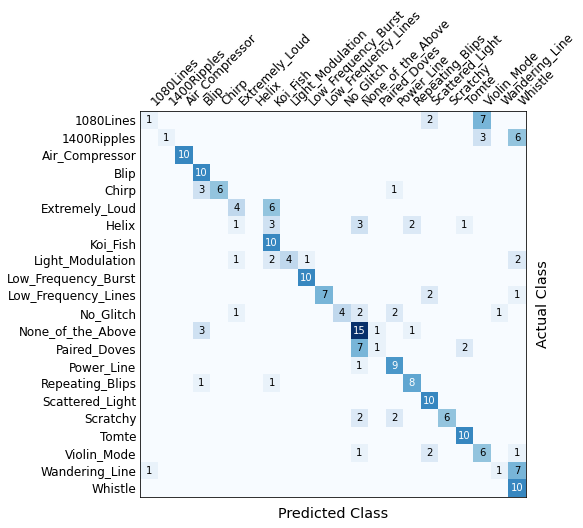

In [ ]:
fig, axes = plot_CM(cm, y_true=y_true, y_pred=y_pred, vocab=vocab, figsize=(8, 8))

In [ ]:
interp = Interpretation.from_learner(learner, ds_idx=2)

In [ ]:
interp.top_losses(10)

torch.return_types.topk(
values=TensorBase([46.8073, 38.2024, 33.2328, 31.6129, 31.3694, 30.3612, 29.9866, 28.6182,
        28.3698, 26.0980]),
indices=TensorBase([102, 101, 227, 213,  68, 211,  87, 218, 100, 110]))

In [ ]:
dls[2].samples.iloc[68]

gravityspy_id      HjCOMZ9pYz
ifo                        H1
label            Paired_Doves
Name: 68, dtype: object

In [ ]:
channel_list = [1, 0, 1, 1, 1, 1, 1, 
                1, 1, 1, 1, 1, 1, 1, 
                0, 1, 0, 0, 0, 0, 0, 
                2, 0, 2, 0, 2, 0, 0,
                1, 1, 0, 0, 0, 0, 0,
                2, 2, 2, 2, 2, 2, 2,
                0, 0, 1, 0, 1, 1, 1]

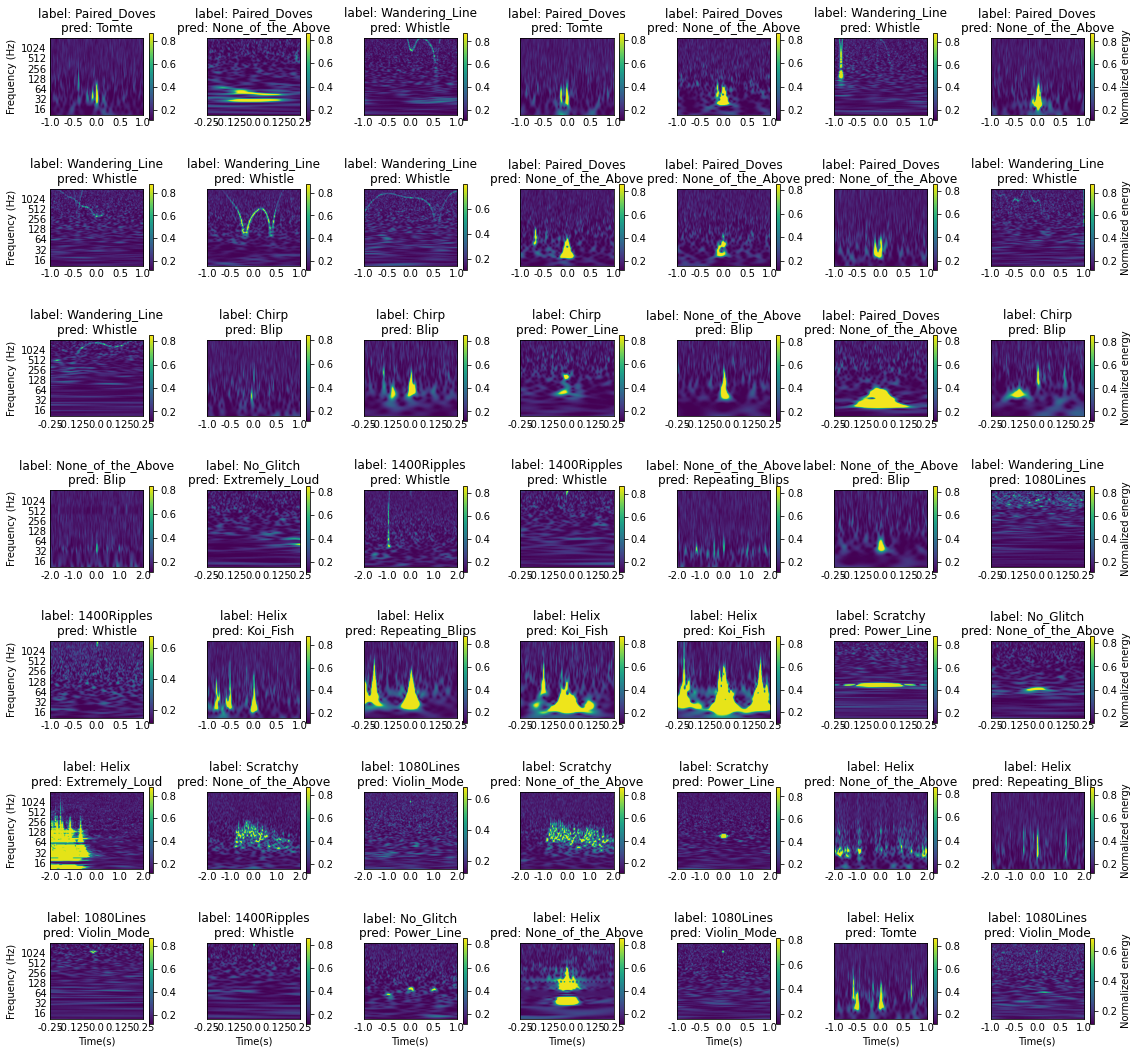

In [ ]:
fig, ax = plot_top_losses_glitches(interp, learner, vocab=vocab, ds_idx=2,
    y_preds=y_pred, channel_list=channel_list,
    largest=True, nrows=7, ncols=7,
    show_label=True, show_pred=True, show_loss=False,
    figsize=(16, 15)
)

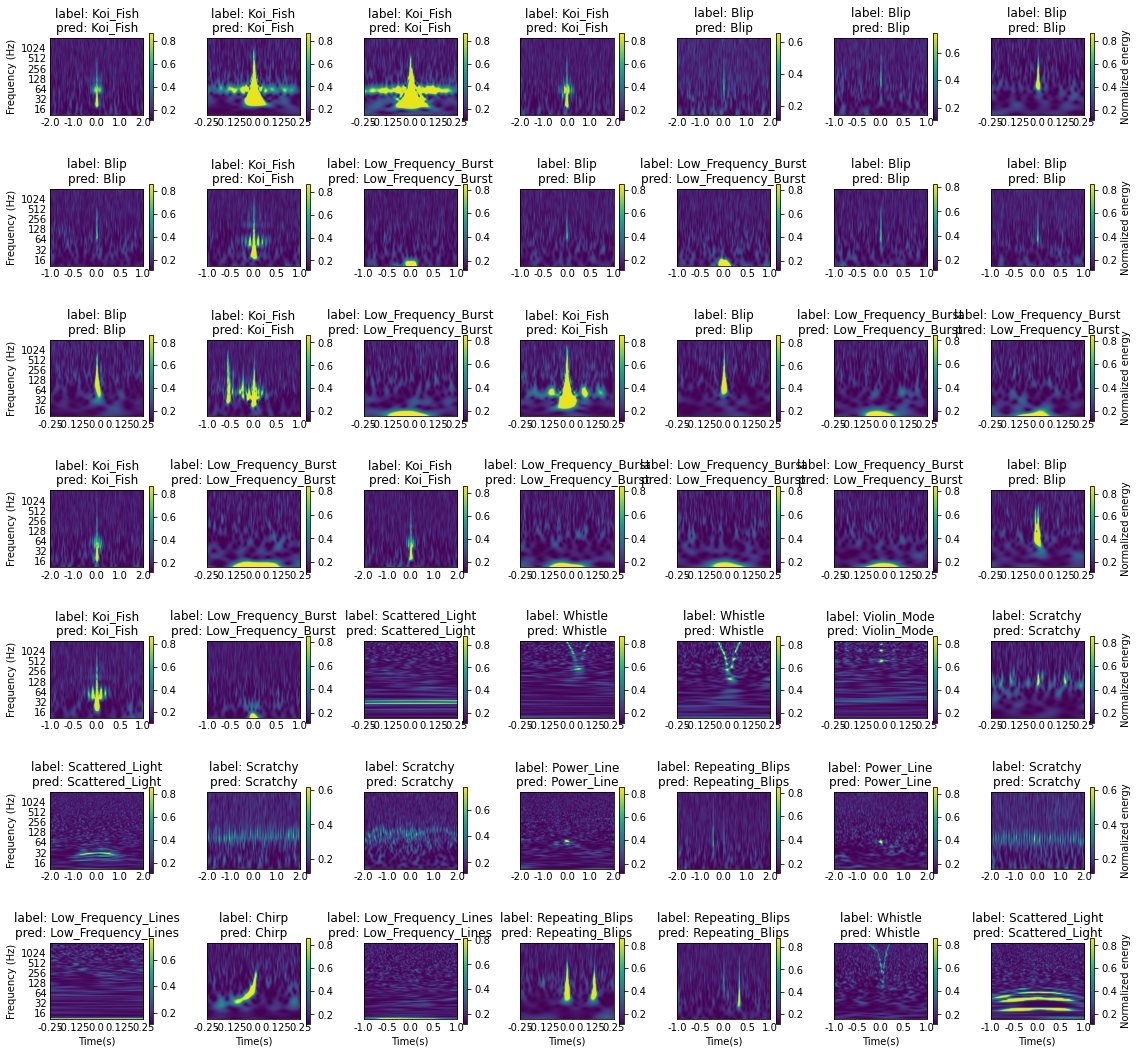

In [ ]:
fig, ax = plot_top_losses_glitches(interp, learner, vocab=vocab, ds_idx=2,
    y_preds=y_pred, channel_list=channel_list,
    largest=False, nrows=7, ncols=7,
    show_label=True, show_pred=True, show_loss=False,
    figsize=(16, 15)
)